In [1]:
import pandas as pd
import seaborn as sns

In [8]:
df = pd.read_csv("Dataset/Admission_Predict.csv")
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
df.shape

(400, 9)

In [13]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold = 0.75)
df["Chance of Admit "] = bi.fit_transform(df[["Chance of Admit "]])

In [22]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [25]:
x = df.drop("Chance of Admit " , axis = 1)
y = df["Chance of Admit "]

In [27]:
y = y.astype('int')

<Axes: xlabel='Chance of Admit ', ylabel='count'>

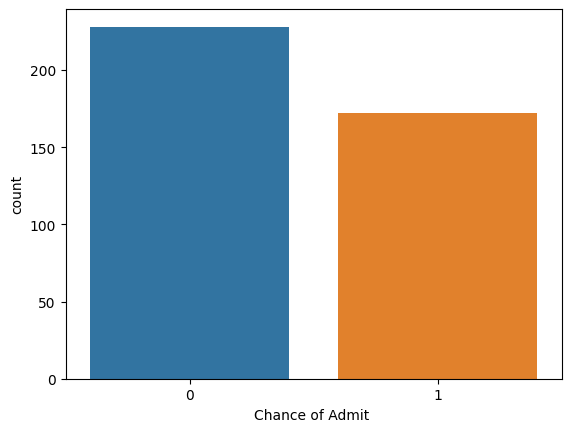

In [29]:
sns.countplot(x = y)

In [31]:
y.value_counts()

Chance of Admit 
0    228
1    172
Name: count, dtype: int64

In [33]:
#Cross validation
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=0 , test_size=0.25)

In [34]:
x_train.shape

(300, 8)

In [35]:
x_test.shape

(100, 8)

In [37]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...,...
146,147,315,105,3,2.0,2.5,8.48,0
135,136,314,109,4,3.5,4.0,8.77,1
390,391,314,102,2,2.0,2.5,8.24,0
264,265,325,110,2,3.0,2.5,8.76,1


In [39]:
#Import tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train , y_train)

DecisionTreeClassifier()

In [41]:
y_pred = classifier.predict(x_test)

In [42]:
result = pd.DataFrame({
    'actual':y_test,
    'predicted' : y_pred
})

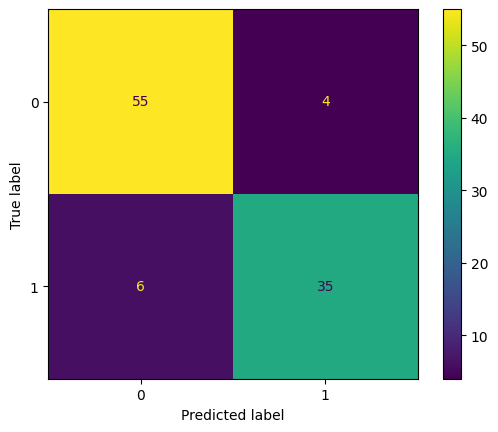

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score , classification_report

ConfusionMatrixDisplay.from_predictions(y_test , y_pred )

In [47]:
accuracy_score(y_test , y_pred)

0.9

In [51]:
print(classification_report(y_test , y_pred ))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        59
           1       0.90      0.85      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.90      0.90      0.90       100



In [55]:
new = [[136 ,314 ,109, 4, 3.5, 4.0 ,8.77,1]]
classifier.predict(new)[0]

/home/mohakborole/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [58]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.5773026315789473, 0.9615384615384616, 'CGPA <= 8.655\ngini = 0.492\nsamples = 300\nvalue = [169, 131]\nclass = NA'),
 Text(0.3848684210526316, 0.8846153846153846, 'LOR  <= 4.25\ngini = 0.14\nsamples = 159\nvalue = [147, 12]\nclass = NA'),
 Text(0.26973684210526316, 0.8076923076923077, 'GRE Score <= 319.5\ngini = 0.089\nsamples = 150\nvalue = [143, 7]\nclass = NA'),
 Text(0.17105263157894737, 0.7307692307692307, 'SOP <= 4.75\ngini = 0.056\nsamples = 138\nvalue = [134, 4]\nclass = NA'),
 Text(0.10526315789473684, 0.6538461538461539, 'CGPA <= 8.51\ngini = 0.043\nsamples = 135\nvalue = [132, 3]\nclass = NA'),
 Text(0.05263157894736842, 0.5769230769230769, 'SOP <= 3.25\ngini = 0.017\nsamples = 119\nvalue = [118, 1]\nclass = NA'),
 Text(0.02631578947368421, 0.5, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]\nclass = NA'),
 Text(0.07894736842105263, 0.5, 'University Rating <= 2.5\ngini = 0.064\nsamples = 30\nvalue = [29, 1]\nclass = NA'),
 Text(0.05263157894736842, 0.4230769230769231, 'R

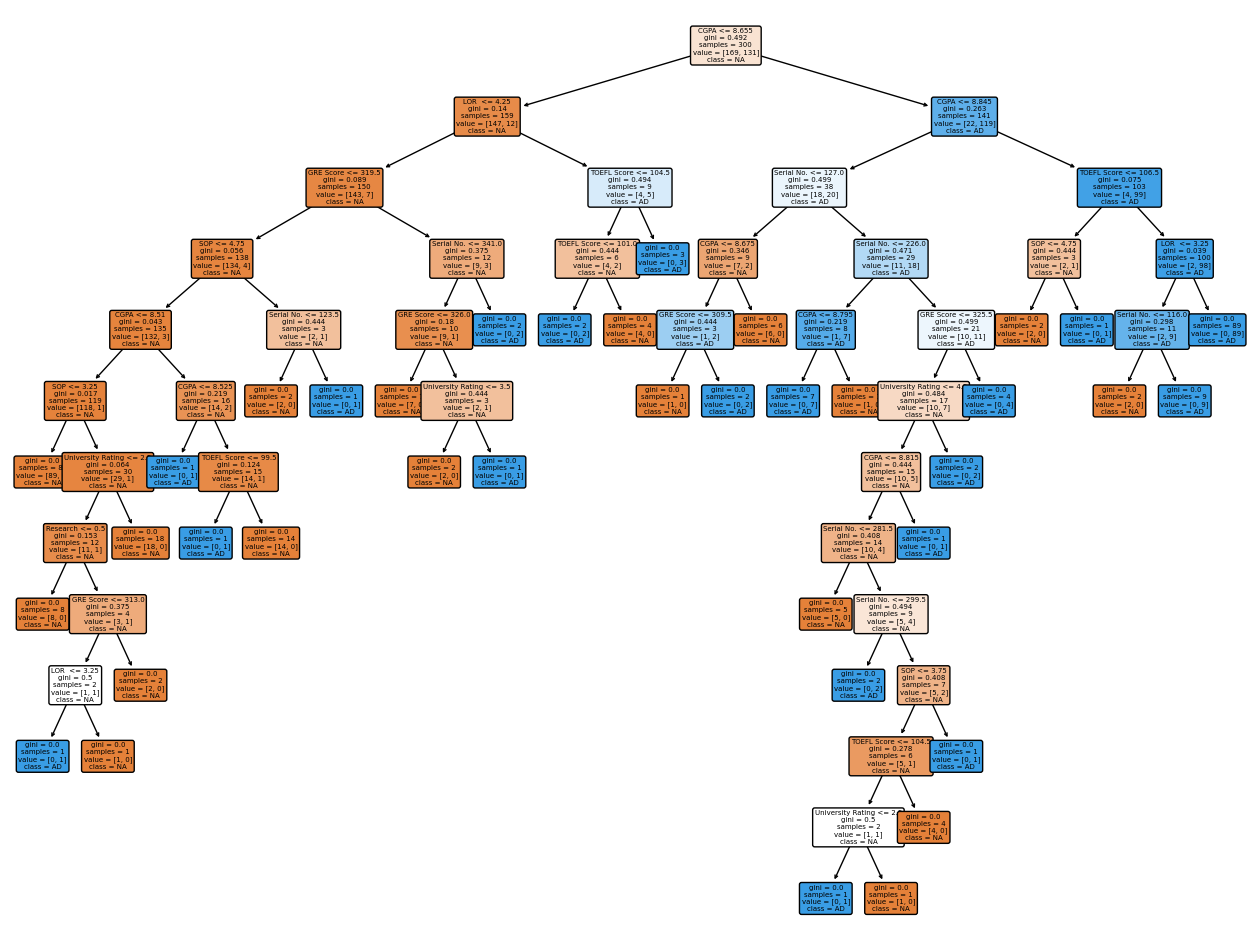

In [64]:
plt.figure(figsize = (16 , 12))
plot_tree(classifier , fontsize=5 , rounded=True , filled=True , feature_names = x.columns , class_names = ['NA' , 'AD'])